# Tibebu Proctor Los Angeles Crime Personal Project

##### Importing needed Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

#### Importing My Data

In [2]:
crime_data = pd.read_csv("Crime_Data_from_2020_to_Present (1).csv")
#looking at 5 random rows of my data
crime_data.sample(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
183773,200204766,01/16/2020 12:00:00 AM,01/16/2020 12:00:00 AM,355,2,Rampart,271,1,210,ROBBERY,...,IC,Invest Cont,210.0,NaN,NaN,NaN,1000 GRAND VIEW ST,NaN,34.0527,-118.2820
219930,211313931,08/07/2021 12:00:00 AM,08/07/2021 12:00:00 AM,30,13,Newton,1323,1,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,...,IC,Invest Cont,236.0,NaN,NaN,NaN,1000 E 23RD ST,NaN,34.0228,-118.2569
323454,211409955,04/18/2021 12:00:00 AM,04/18/2021 12:00:00 AM,1,14,Pacific,1414,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,600 INDIANA AV,NaN,33.9962,-118.4694
875417,241507635,03/15/2024 12:00:00 AM,02/14/2024 12:00:00 AM,900,15,N Hollywood,1548,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,5200 VINELAND AV,NaN,34.1649,-118.3703
452232,222008452,04/04/2022 12:00:00 AM,04/01/2022 12:00:00 AM,1200,20,Olympic,2026,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440.0,NaN,NaN,NaN,400 S NEW HAMPSHIRE AV,NaN,34.0674,-118.2929


In [3]:
#crime_data shape 
crime_data.shape#my data has 918443 rows and 28 columns

(918443, 28)

### What is my goal with this data?

The goal with the `crime_data` dataset is to investigate potential correlations and patterns between various factors related to crime occurrences. Specifically, the aim is to analyze how the location and time of crime incidents relate to each other and potentially influence the frequency or nature of criminal activities. This analysis seeks to uncover insights that could aid in understanding crime dynamics within the dataset, identifying trends or hotspots in criminal activity, and informing strategies for crime prevention and law enforcement resource allocation.

### Hypthosis 

The hypothesis posits that there exists a correlation between the location and time of criminal incidents and the frequency or occurrence of crime. This implies that certain areas or times may be more prone to criminal activity compared to others. The investigation aims to test this hypothesis by analyzing the crime_data dataset to uncover potential patterns or relationships between the spatial and temporal aspects of crime occurrences.

### null hypothesis
The null hypothesis is that there's no significant connection between where and when crimes happen.

# Now I can start cleaning my data

#### Describtive Analysis-  Studying my data

In [4]:
#replacing all the spaces with "_ " in the column names so it is python friendly
def adjust_column_name(df):
    for column in df.columns:
        df.rename(columns={column:column.replace(" ","_")}, inplace = True)
adjust_column_name(crime_data)
    

In [5]:
#this tells me data type of each of my variables and also the number of rows and columns.
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918443 entries, 0 to 918442
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           918443 non-null  int64  
 1   Date_Rptd       918443 non-null  object 
 2   DATE_OCC        918443 non-null  object 
 3   TIME_OCC        918443 non-null  int64  
 4   AREA            918443 non-null  int64  
 5   AREA_NAME       918443 non-null  object 
 6   Rpt_Dist_No     918443 non-null  int64  
 7   Part_1-2        918443 non-null  int64  
 8   Crm_Cd          918443 non-null  int64  
 9   Crm_Cd_Desc     918443 non-null  object 
 10  Mocodes         790151 non-null  object 
 11  Vict_Age        918443 non-null  int64  
 12  Vict_Sex        796365 non-null  object 
 13  Vict_Descent    796356 non-null  object 
 14  Premis_Cd       918433 non-null  float64
 15  Premis_Desc     917886 non-null  object 
 16  Weapon_Used_Cd  317500 non-null  float64
 17  Weapon_Des

The column names are shortened to make the data compact. For example Date Rptd stands for Date Reported. This could be confusing to me when I try to analyze my data so I am going to put the full name of each column next to the actual name;
        
        DR_NO   -   Division of Records Number
        Date Rptd - Date Reported 
        DATE OCC  - Date occurrence
        TIME OCC  - Time occurrence
        AREA     -  Geographic Areas numbered 1-21
        AREA NAME - Name of the area
        Rpt Dist No - Reported District number
        Part 1-2   - 
        Crm Cd     - Indicates the crime committed
        Crm Cd Desc - Defines the Crime Code provided
        Mocodes     - Modus Operandi: Activities associated with the suspect in commission of the crime.
        Vict Age    - Age of the Victim
        Vict Sex    - Sex of Victim
        Vict Descent - Victim Descendent(ethnicity or racial background of victim)
        Premis Cd    - Premise Code(location or premise where the incident occured)
        Premis Desc  - Premise Description(information about the premise)
        Weapon Used Cd -  Weapon Used in crime(the type of weapon used)
        Weapon Desc   - Weapon Description
        Status        - Status of the case (IC-(investigation complete) is the default)
        Status Desc  - Status description(description or explanation corresponding to the status codes found in the Status) 
        Crm Cd 1  - primary crime or the worst crime committed 
        Crm Cd 2 - The second worst crime committed 
        Crm Cd 3  - The third worst crime committed 
        Crm Cd 4  - The fourth worst crime committed if any
        LOCATION  - Street address of crime incident rounded to the nearest hundred block to maintain anonymity.
        Cross Street - Cross Street of rounded Address
        LAT        - Latitude of where crime happened
        LON        - Longtitude of where crime happened 

In [6]:
#Seeing missing values in each column
crime_data.isna().sum()

DR_NO                  0
Date_Rptd              0
DATE_OCC               0
TIME_OCC               0
AREA                   0
AREA_NAME              0
Rpt_Dist_No            0
Part_1-2               0
Crm_Cd                 0
Crm_Cd_Desc            0
Mocodes           128292
Vict_Age               0
Vict_Sex          122078
Vict_Descent      122087
Premis_Cd             10
Premis_Desc          557
Weapon_Used_Cd    600943
Weapon_Desc       600943
Status                 0
Status_Desc            0
Crm_Cd_1              11
Crm_Cd_2          851659
Crm_Cd_3          916192
Crm_Cd_4          918378
LOCATION               0
Cross_Street      774119
LAT                    0
LON                    0
dtype: int64

In [7]:
#Seeing percent of missing values in each column
missing_percent = (crime_data.isna().sum()/len(crime_data))*100
missing_percent

DR_NO              0.000000
Date_Rptd          0.000000
DATE_OCC           0.000000
TIME_OCC           0.000000
AREA               0.000000
AREA_NAME          0.000000
Rpt_Dist_No        0.000000
Part_1-2           0.000000
Crm_Cd             0.000000
Crm_Cd_Desc        0.000000
Mocodes           13.968423
Vict_Age           0.000000
Vict_Sex          13.291843
Vict_Descent      13.292823
Premis_Cd          0.001089
Premis_Desc        0.060646
Weapon_Used_Cd    65.430626
Weapon_Desc       65.430626
Status             0.000000
Status_Desc        0.000000
Crm_Cd_1           0.001198
Crm_Cd_2          92.728563
Crm_Cd_3          99.754911
Crm_Cd_4          99.992923
LOCATION           0.000000
Cross_Street      84.286014
LAT                0.000000
LON                0.000000
dtype: float64

#### Visualizing the Missing Values in Each of my Columns

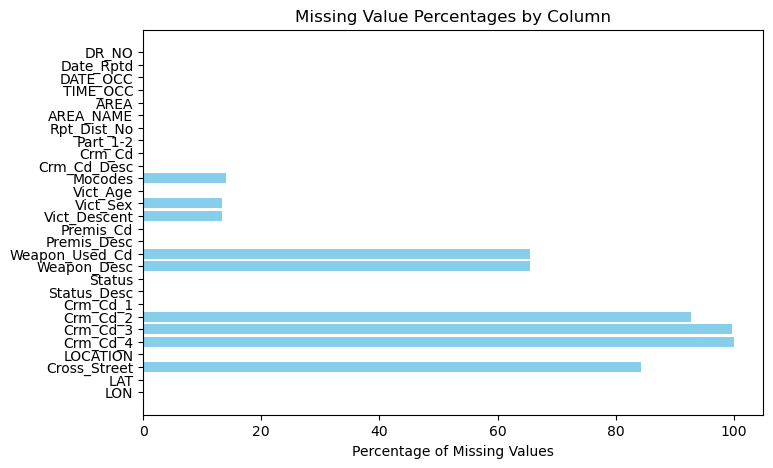

In [8]:
columns = ['DR_NO', 'Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA', 'AREA_NAME', 'Rpt_Dist_No', 
           'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Mocodes', 'Vict_Age', 'Vict_Sex', 'Vict_Descent', 
           'Premis_Cd', 'Premis_Desc', 'Weapon_Used_Cd', 'Weapon_Desc', 'Status', 'Status_Desc', 
           'Crm_Cd_1', 'Crm_Cd_2', 'Crm_Cd_3', 'Crm_Cd_4', 'LOCATION', 'Cross_Street', 'LAT', 'LON']
missing_percentages = [0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000,
                       0.000000, 0.000000, 13.968423, 0.000000, 13.291843, 13.292823, 0.001089, 0.060646,
                       65.430626, 65.430626, 0.000000, 0.000000, 0.001198, 92.728563, 99.754911, 99.992923,
                       0.000000, 84.286014, 0.000000, 0.000000]
#creating a horizontal bar graph
plt.figure(figsize=(8, 5))
plt.barh(columns, missing_percentages, color='skyblue')
plt.xlabel('Percentage of Missing Values')
plt.title('Missing Value Percentages by Column')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest percentage at the top
plt.show()

#### Dropping Some Columns 

In [9]:
#I am going to drop some columns because they are either irrelevant in answering my hypothesis or missing over 70% of the data
crime_data.drop(columns= ["Crm_Cd_4","Crm_Cd_3","Crm_Cd_2","Cross_Street","Part_1-2", "Mocodes"], inplace = True)

In [10]:
pd.set_option("display.max_columns", 23)#this shows me all my 23 columns 
crime_data.head()

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Weapon_Used_Cd,Weapon_Desc,Status,Status_Desc,Crm_Cd_1,LOCATION,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,510,VEHICLE - STOLEN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,330,BURGLARY FROM VEHICLE,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,480,BIKE - STOLEN,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,354,THEFT OF IDENTITY,28,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,1900 TRANSIENT,34.0944,-118.3277


## Missig Values 

In [11]:
#I need to look deep into Weapon Used Cd, and Weapon Desc because it is important to know but it has too many missing values
crime_data[["Weapon_Used_Cd","Weapon_Desc"]].sample(10)

,Weapon_Used_Cd,Weapon_Desc
242084,NaN,NaN
209109,NaN,NaN
170157,NaN,NaN
513749,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"
231854,NaN,NaN
285534,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"
626118,307.0,VEHICLE
484949,102.0,HAND GUN
716319,NaN,NaN
730712,NaN,NaN


In [12]:
#seeing the difference between the missing data and the none missing data
missing_mask = crime_data["Weapon_Used_Cd"].isna()
missing_values = crime_data[missing_mask]

none_missing_values = crime_data[~missing_mask]

In [13]:
missing_count = missing_values.shape[0]
none_missing_count = none_missing_values.shape[0]
print(f"Missing_Values: {missing_count}")
print(f"Not Missing Values: {none_missing_count}")
total_count = missing_count + none_missing_count

Missing_Values: 600943
Not Missing Values: 317500


In [14]:
missing_percent = (missing_count / total_count) * 100
none_missing_percent = (none_missing_count / total_count) * 100

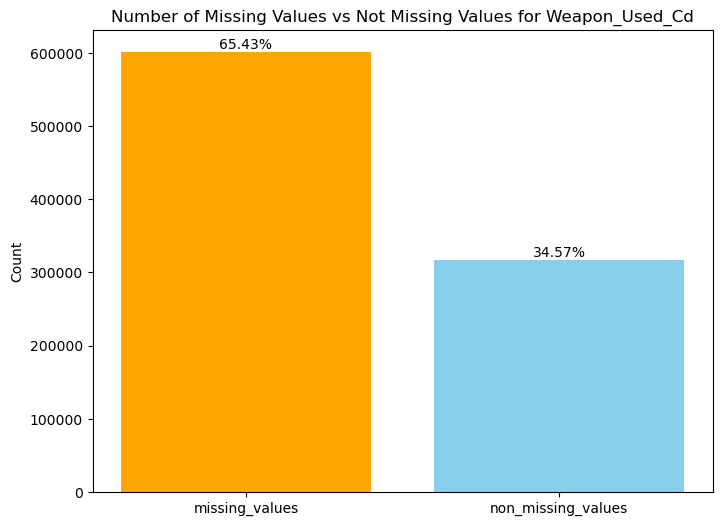

In [15]:
plt.figure(figsize =(8,6))
plt.bar(["missing_values","non_missing_values"],[missing_count,none_missing_count], color =["orange","skyblue"])
plt.title("Number of Missing Values vs Not Missing Values for Weapon_Used_Cd")
plt.ylabel("Count")
plt.text(0, missing_count, f"{missing_percent:.2f}%", ha="center", va="bottom")
plt.text(1, none_missing_count, f"{none_missing_percent:.2f}%", ha="center", va="bottom")


plt.show()

##### Possibilities of why so many data for Weapon Used Cd and Weapon Description are missing 

It seems that the majority of data for the "Weapon Used Cd" and "Weapon Description" columns are missing, accounting for more than 65% of the dataset. There could be several reasons for this high rate of missing values. One possibility is that in many reported conflicts, no weapons were used at all, which seems plausible considering the non-random pattern of missing values between these two columns. Another possibility is that the information regarding weapons used was simply not recorded or documented properly.

To address this issue, one potential approach could involve leveraging machine learning techniques to predict the type of weapon used based on other available information and historical data on previous conflicts. However, for the purpose of answering my hypothesis about the relationship between location, time, and the occurrence of crime, it might be more prudent to temporarily exclude these columns from my analysis.

By doing so, I can streamline my dataset and focus on the variables that are more likely to provide meaningful insights into my research question. Although it's valuable information to have, given the significant amount of missing data and its potential impact on the analysis, it seems appropriate to set aside the "Weapon Used Cd" and "Weapon Description" columns for now.

In [16]:
#dropping weapon Used and weapon description data
crime_data.drop(columns=["Weapon_Used_Cd","Weapon_Desc"], inplace = True)

In [17]:
crime_data.head(2)

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Status,Status_Desc,Crm_Cd_1,LOCATION,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,510,VEHICLE - STOLEN,0,M,O,101.0,STREET,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,330,BURGLARY FROM VEHICLE,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628


### Missig Values in Vict_Sex and Vict_Descent
It appears that approximately 13% of the data in the "Vict_Sex" and "Vict_Descent" columns are missing. Notably, the missing values in these columns do not seem to occur randomly; rather, if a value is missing in one column, it is also likely to be missing in the other. Given that both "Vict_Sex" and "Vict_Descent" are important variables for my analysis, it would be beneficial to retain this information.

To handle the missing values in these columns, I propose creating a new category called "Unknown" that encompasses all the missing values. By doing so, I can retain the integrity of the dataset while acknowledging the absence of specific information for these cases. This approach allows me to maintain the completeness of the dataset and ensures that I can still analyze the available data effectively.

In [18]:
crime_data["Vict_Sex"].fillna("Unknown", inplace =True)
crime_data["Vict_Descent"].fillna("Unknown", inplace = True)

In [19]:
#My latest kept columns and their percent af missing values
missing_percent = round((crime_data.isna().sum()/len(crime_data))*100,3)
missing_percent

DR_NO           0.000
Date_Rptd       0.000
DATE_OCC        0.000
TIME_OCC        0.000
AREA            0.000
AREA_NAME       0.000
Rpt_Dist_No     0.000
Crm_Cd          0.000
Crm_Cd_Desc     0.000
Vict_Age        0.000
Vict_Sex        0.000
Vict_Descent    0.000
Premis_Cd       0.001
Premis_Desc     0.061
Status          0.000
Status_Desc     0.000
Crm_Cd_1        0.001
LOCATION        0.000
LAT             0.000
LON             0.000
dtype: float64

In [20]:
#I can drop the rest of the missing values because it is a really small percent 
crime_data.dropna(inplace=True)
crime_data.isna().sum()

DR_NO           0
Date_Rptd       0
DATE_OCC        0
TIME_OCC        0
AREA            0
AREA_NAME       0
Rpt_Dist_No     0
Crm_Cd          0
Crm_Cd_Desc     0
Vict_Age        0
Vict_Sex        0
Vict_Descent    0
Premis_Cd       0
Premis_Desc     0
Status          0
Status_Desc     0
Crm_Cd_1        0
LOCATION        0
LAT             0
LON             0
dtype: int64

In [21]:
crime_data.head(3)

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Status,Status_Desc,Crm_Cd_1,LOCATION,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,510,VEHICLE - STOLEN,0,M,O,101.0,STREET,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,330,BURGLARY FROM VEHICLE,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,480,BIKE - STOLEN,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002


## Cleaning String  Data 

In [22]:
crime_data["LOCATION"].value_counts()

800 N  ALAMEDA                      ST      1755
6TH                          ST             1535
10200    SANTA MONICA                 BL    1471
7TH                          ST             1446
7TH                                         1414
                                            ... 
UNK FOOTHILL                                   1
11000    CULVER                       BL       1
2300    EASTERN CANAL                          1
7200    SPRING                       CT        1
9500    LA CIENEGA                   BL        1
Name: LOCATION, Length: 65308, dtype: int64

I want to create a Function the removes all the white spaces that is more than one space between words and replace it with one space.

In [23]:
def remove_extra_spaces(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].str.replace(r'\s+', ' ', regex = True)
    return df
remove_extra_spaces(crime_data).head(2)

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Status,Status_Desc,Crm_Cd_1,LOCATION,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,510,VEHICLE - STOLEN,0,M,O,101.0,STREET,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,330,BURGLARY FROM VEHICLE,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628


In [24]:
#see the change of spaces 
crime_data["LOCATION"].value_counts()

800 N ALAMEDA ST         1755
6TH ST                   1535
10200 SANTA MONICA BL    1471
7TH ST                   1446
7TH                      1414
                         ... 
SHELTONDALE AV              1
CRUCES                      1
7000 ALVERSTONE AV          1
EMERY                       1
9500 LA CIENEGA BL          1
Name: LOCATION, Length: 65214, dtype: int64

In [25]:
#Looking at all the unique data values in each column of my dataset
def uniqu_in_data(df):
    unique_values ={}
    for column in df.columns:
        unique_values[column]=df[column].unique()
    return unique_values
uniqu_in_data(crime_data)
    
    


{'DR_NO': array([190326475, 200106753, 200320258, ..., 242106032, 242004546,
        240104953], dtype=int64),
 'Date_Rptd': array(['03/01/2020 12:00:00 AM', '02/09/2020 12:00:00 AM',
        '11/11/2020 12:00:00 AM', ..., '09/17/2023 12:00:00 AM',
        '07/04/2023 12:00:00 AM', '07/09/2023 12:00:00 AM'], dtype=object),
 'DATE_OCC': array(['03/01/2020 12:00:00 AM', '02/08/2020 12:00:00 AM',
        '11/04/2020 12:00:00 AM', ..., '01/04/2024 12:00:00 AM',
        '02/06/2024 12:00:00 AM', '03/18/2024 12:00:00 AM'], dtype=object),
 'TIME_OCC': array([2130, 1800, 1700, ...,  559,  818,  841], dtype=int64),
 'AREA': array([ 7,  1,  3,  9,  6, 18, 13, 19,  2, 10,  8, 20,  4, 21, 11, 12, 14,
        15,  5, 16, 17], dtype=int64),
 'AREA_NAME': array(['Wilshire', 'Central', 'Southwest', 'Van Nuys', 'Hollywood',
        'Southeast', 'Newton', 'Mission', 'Rampart', 'West Valley',
        'West LA', 'Olympic', 'Hollenbeck', 'Topanga', 'Northeast',
        '77th Street', 'Pacific', 'N Hollywoo

In [26]:
#Grouping LAT and LON based on Location and seeing the counts of crime 
crime_data.groupby(["LAT","LON",])["LOCATION"].value_counts(ascending = False)

LAT      LON        LOCATION         
0.0000    0.0000    6800 HOLLYWOOD BL    20
                    800 N ALAMEDA ST     16
                    300 WORLD WY         12
                    9300 TAMPA AV        11
                    700 W 7TH ST         10
                                         ..
34.3293  -118.4246  13400 TREGO ST        1
34.3297  -118.4301  13400 POLK ST         2
34.3330  -118.5060  SIERRA HY             1
34.3343  -118.5047  22100 SIERRA HY       1
                    FOOTHILL BL           1
Name: LOCATION, Length: 160989, dtype: int64

Given that I already have latitude and longitude coordinates, which provide accurate location information, the presence of the "location" column becomes redundant. Additionally, if the "location" column contains incorrect or inconsistent data for some entries, it further justifies its removal from the dataset.

Removing the "location" column will streamline the dataset and prevent potential confusion or errors arising from inconsistent or inaccurate location data. With latitude and longitude coordinates available, I have precise location information that adequately serves my analytical needs. Thus, removing the redundant "location" column ensures data cleanliness and facilitates more accurate analysis.

In [27]:
crime_data.drop(columns =["LOCATION"], inplace = True)

## Machine Learning To Predict LON and LAT based on Other features

In [28]:
crime_data[crime_data["LON"]==0].head(5)

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Status,Status_Desc,Crm_Cd_1,LAT,LON
562,211410751,04/30/2021 12:00:00 AM,06/12/2020 12:00:00 AM,930,14,Pacific,1438,354,THEFT OF IDENTITY,30,F,B,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,354.0,0.0,0.0
2405,200416028,12/17/2020 12:00:00 AM,12/17/2020 12:00:00 AM,1525,4,Hollenbeck,473,900,VIOLATION OF COURT ORDER,65,M,H,504.0,OTHER RESIDENCE,IC,Invest Cont,900.0,0.0,0.0
2630,201517780,11/20/2020 12:00:00 AM,11/20/2020 12:00:00 AM,1849,15,N Hollywood,1555,648,ARSON,0,X,X,101.0,STREET,IC,Invest Cont,648.0,0.0,0.0
2916,200817064,12/01/2020 12:00:00 AM,12/01/2020 12:00:00 AM,1340,8,West LA,882,440,THEFT PLAIN - PETTY ($950 & UNDER),0,X,X,101.0,STREET,IC,Invest Cont,440.0,0.0,0.0
3091,201410528,05/06/2020 12:00:00 AM,05/06/2020 12:00:00 AM,740,14,Pacific,1494,888,TRESPASSING,0,X,X,212.0,TRANSPORTATION FACILITY (AIRPORT),IC,Invest Cont,888.0,0.0,0.0


In my LAT and LON columns, I've noticed instances where the values indicate that a crime has occurred at LAT 0 and LON 0. This is improbable because LAT and LON values of 0 would correspond to a location at the equator, which is not applicable to the context of crimes in LA.

To address this issue, I have a few potential approaches. One is, I can manually review the location information associated with each entry to determine the correct LAT and LON values. Second is, I can exclude the entries where LAT and LON are equal to 0 from the analysis. The third possiblity is using machine learing based on the other features and predict LON and LAT. 

Given the large volume of data and the potential complexity involved in manually reviewing location information, I opt to utilize machine learning techniques. Specifically, I plan to leverage the "AREA" feature to train a model that predicts LAT and LON values for entries where they are currently recorded as 0. By utilizing the existing geographical information in the "AREA" feature, I aim to infer more accurate LAT and LON coordinates for these instances, enhancing the overall quality and reliability of the dataset for analysis purposes.

### Using Random Forest To Predict LON and LAT for values that say 0

In [29]:
len(crime_data[crime_data["LAT"]==0.0000])#there are over 2000 rows where the LAT and LON are not correct

2264

In [30]:
len(crime_data[crime_data["LON"]==0.0000])

2264

In [31]:
#these are all the LON and LOT that say 0
wrong_lon_lat = crime_data[crime_data["LAT"]==0]
wrong_lon_lat.head(5)


,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Status,Status_Desc,Crm_Cd_1,LAT,LON
562,211410751,04/30/2021 12:00:00 AM,06/12/2020 12:00:00 AM,930,14,Pacific,1438,354,THEFT OF IDENTITY,30,F,B,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,354.0,0.0,0.0
2405,200416028,12/17/2020 12:00:00 AM,12/17/2020 12:00:00 AM,1525,4,Hollenbeck,473,900,VIOLATION OF COURT ORDER,65,M,H,504.0,OTHER RESIDENCE,IC,Invest Cont,900.0,0.0,0.0
2630,201517780,11/20/2020 12:00:00 AM,11/20/2020 12:00:00 AM,1849,15,N Hollywood,1555,648,ARSON,0,X,X,101.0,STREET,IC,Invest Cont,648.0,0.0,0.0
2916,200817064,12/01/2020 12:00:00 AM,12/01/2020 12:00:00 AM,1340,8,West LA,882,440,THEFT PLAIN - PETTY ($950 & UNDER),0,X,X,101.0,STREET,IC,Invest Cont,440.0,0.0,0.0
3091,201410528,05/06/2020 12:00:00 AM,05/06/2020 12:00:00 AM,740,14,Pacific,1494,888,TRESPASSING,0,X,X,212.0,TRANSPORTATION FACILITY (AIRPORT),IC,Invest Cont,888.0,0.0,0.0


In [32]:
#these are all the correct LON and LAT
correct_lon_lat = crime_data[crime_data["LAT"]!=0]
correct_lon_lat.head(5)

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Status,Status_Desc,Crm_Cd_1,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,510,VEHICLE - STOLEN,0,M,O,101.0,STREET,AA,Adult Arrest,510.0,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,330,BURGLARY FROM VEHICLE,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.0,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,480,BIKE - STOLEN,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480.0,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,405.0,CLOTHING STORE,IC,Invest Cont,343.0,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,354,THEFT OF IDENTITY,28,M,H,102.0,SIDEWALK,IC,Invest Cont,354.0,34.0944,-118.3277


In [33]:
X = correct_lon_lat[["AREA"]]#features
y = correct_lon_lat[["LAT","LON"]]#Target

In [34]:
X_missing = wrong_lon_lat[["AREA"]]#feature for missing values
X_train = X
y_train = y.loc[X.index]

In [35]:
#import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor

In [36]:
#creating a model and fitting
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
#Putting the predicted values back and into the missing 
predictions = model.predict(X_missing)
wrong_lon_lat.loc[:,["LAT","LON"]] = predictions

C:\Users\tibeb\AppData\Local\Temp\ipykernel_22372\4094302872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_lon_lat.loc[:,["LAT","LON"]] = predictions


In [38]:
#checking my mean absolute error just in case
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
actual_value = wrong_lon_lat[["LAT","LON"]]
predicted_values = predictions
mae = mean_absolute_error(actual_value, predicted_values)
print(f"Mean Absolute Error is:{mae}")

Mean Absolute Error is:0.0


In [39]:
#Checking my mean squared error and R2
mse = mean_squared_error(actual_value, predicted_values)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared (R2) Score
r2 = r2_score(actual_value, predicted_values)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.0
R-squared (R2) Score: 1.0


In [40]:
wrong_lon_lat.loc[:, ['LAT', 'LON']] = predictions

C:\Users\tibeb\AppData\Local\Temp\ipykernel_22372\634182012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_lon_lat.loc[:, ['LAT', 'LON']] = predictions


In [41]:
wrong_lon_lat.head(3)

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Status,Status_Desc,Crm_Cd_1,LAT,LON
562,211410751,04/30/2021 12:00:00 AM,06/12/2020 12:00:00 AM,930,14,Pacific,1438,354,THEFT OF IDENTITY,30,F,B,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,354.0,33.984254,-118.424256
2405,200416028,12/17/2020 12:00:00 AM,12/17/2020 12:00:00 AM,1525,4,Hollenbeck,473,900,VIOLATION OF COURT ORDER,65,M,H,504.0,OTHER RESIDENCE,IC,Invest Cont,900.0,34.054231,-118.203337
2630,201517780,11/20/2020 12:00:00 AM,11/20/2020 12:00:00 AM,1849,15,N Hollywood,1555,648,ARSON,0,X,X,101.0,STREET,IC,Invest Cont,648.0,34.171534,-118.384691


In [42]:
#putting data together after the LAT and LON is predicted and make it crime data again
crime_data = pd.concat([wrong_lon_lat, correct_lon_lat])
crime_data = crime_data.reset_index(drop=True)

In [43]:
crime_data.head()

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Status,Status_Desc,Crm_Cd_1,LAT,LON
0,211410751,04/30/2021 12:00:00 AM,06/12/2020 12:00:00 AM,930,14,Pacific,1438,354,THEFT OF IDENTITY,30,F,B,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,354.0,33.984254,-118.424256
1,200416028,12/17/2020 12:00:00 AM,12/17/2020 12:00:00 AM,1525,4,Hollenbeck,473,900,VIOLATION OF COURT ORDER,65,M,H,504.0,OTHER RESIDENCE,IC,Invest Cont,900.0,34.054231,-118.203337
2,201517780,11/20/2020 12:00:00 AM,11/20/2020 12:00:00 AM,1849,15,N Hollywood,1555,648,ARSON,0,X,X,101.0,STREET,IC,Invest Cont,648.0,34.171534,-118.384691
3,200817064,12/01/2020 12:00:00 AM,12/01/2020 12:00:00 AM,1340,8,West LA,882,440,THEFT PLAIN - PETTY ($950 & UNDER),0,X,X,101.0,STREET,IC,Invest Cont,440.0,34.051588,-118.440587
4,201410528,05/06/2020 12:00:00 AM,05/06/2020 12:00:00 AM,740,14,Pacific,1494,888,TRESPASSING,0,X,X,212.0,TRANSPORTATION FACILITY (AIRPORT),IC,Invest Cont,888.0,33.984254,-118.424256


C:\Users\tibeb\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


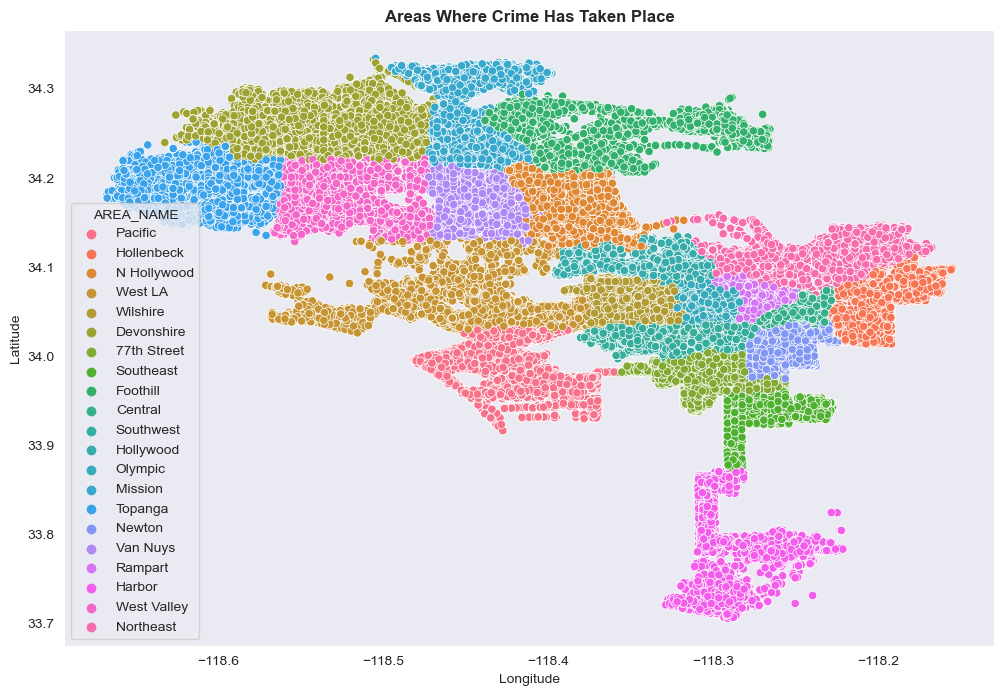

In [44]:
#what it visually looks like if I look at Areas where crime happen and LON and LAT
sns.set_style("dark")

plt.figure(figsize = (12,8))
sns.scatterplot(x = "LON", y = "LAT", data = crime_data, hue = "AREA_NAME")
plt.title("Areas Where Crime Has Taken Place",fontdict={'fontweight': 'bold'})
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.legend(title ="AREA_NAME")
plt.show()

## Now looking into Premis Description to see in what kind of areas or facilities crime took place

In [45]:
#looks all the unique description and their count of crime activity
crime_data["Premis_Desc"].value_counts().head(10)

STREET                                          232872
SINGLE FAMILY DWELLING                          154814
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    112120
PARKING LOT                                      63460
OTHER BUSINESS                                   43775
SIDEWALK                                         39190
VEHICLE, PASSENGER/TRUCK                         26881
GARAGE/CARPORT                                   17678
DRIVEWAY                                         14689
DEPARTMENT STORE                                 11848
Name: Premis_Desc, dtype: int64

In [46]:
#All the unique values of premis description
crime_data["Premis_Desc"].unique()

array(['SINGLE FAMILY DWELLING', 'OTHER RESIDENCE', 'STREET',
       'TRANSPORTATION FACILITY (AIRPORT)',
       'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)', 'DRIVEWAY',
       'PARK/PLAYGROUND', 'SIDEWALK', 'CELL PHONE STORE',
       'OTHER BUSINESS', 'POST OFFICE', 'DRUG STORE', 'LIQUOR STORE',
       "MOBILE HOME/TRAILERS/CONSTRUCTION TRAILERS/RV'S/MOTORHOME",
       'FRAT HOUSE/SORORITY/DORMITORY', 'OTHER STORE',
       'YARD (RESIDENTIAL/BUSINESS)', 'PARKING LOT', 'WATER FACILITY',
       'HOSPITAL', 'RESTAURANT/FAST FOOD', 'OTHER PREMISE', 'VACANT LOT',
       'LA UNION STATION (NOT LINE SPECIFIC)',
       "DIY CENTER (LOWE'S,HOME DEPOT,OSH,CONTRACTORS WAREHOUSE)",
       'HOTEL', 'DEPARTMENT STORE', 'POLICE FACILITY',
       'VEHICLE, PASSENGER/TRUCK', 'MUSEUM', 'GAS STATION',
       'SHOPPING MALL (COMMON AREA)', 'MARKET', 'PORCH, RESIDENTIAL',
       'FREEWAY', 'MAIL BOX', 'ABANDONED BUILDING ABANDONED HOUSE',
       'OFFICE BUILDING/OFFICE', 'MOTEL', 'OTHER/OUTSIDE',
     

In [47]:
#the number of unique Premis Description
crime_data["Premis_Desc"].nunique()

306

Below I am grouping all unique premises descriptions into five categories based on their nature using mapping:
1. Residential Areas
2. Transportation Facilities
3. Recreational and Cultural Areas
4. Miscellaneous
5. Educational Institutions

In [48]:
replacement_map = {
    'SINGLE FAMILY DWELLING|SHORT-TERM VACATION RENTAL|TOOL SHED*|STAIRWELL*|HIGH-RISE BUILDING|HOUSING|BALCONY*|PATIO*|GROUP HOME|CONDOMINIUM/TOWNHOUSE|RESIDENCE|APARTMENT|MOTORHOME|FRAT HOUSE|HOTEL|ABANDONED BUILDING ABANDONED HOUSE|NURSING/CONVALESCENT/RETIREMENT HOME|HOTEL|TRANSIENT ENCAMPMENT|PORCH, RESIDENTIAL|FOSTER HOME BOYS OR GIRLS*|SINGLE RESIDENCE|Mobile Home|MOTEL': 'Residential Areas',
    "STREET|CARS|TRUCK, COMMERICAL|CATERING/ICE CREAM TRUCK|AIRCRAFT|SLIPS/DOCK/MARINA/BOAT|VEHICLE STORAGE LOT (CARS, TRUCKS, RV'S, BOATS, TRAILERS, ETC.)|DRIVEWAY|PARK/PLAYGROUND|SIDEWALK|PARKING LOT|FREEWAY|ALLEY|PARKING UNDERGROUND/BUILDING|BUS STOP/LAYOVER|UNDERPASS/BRIDGE|PEDESTRIAN OVERCROSSING|RIVER BED": 'Street and Parking Areas',
    'CELL PHONE STORE|OIL REFINERY|SAVINGS & LOAN|COMPUTER SERVICES/REPAIRS/SALES|CREDIT UNION|GARMENT MANUFACTURER|FINANCE COMPANY|GUN/SPORTING GOODS|MANUFACTURING COMPANY|NAIL SALON|NURSERY/FLOWER SHOP|CAR WASH|CHECK CASHING*|TOBACCO SHOP|AUTO|AUTO REPAIR SHOP|OTHER BUSINESS|BUSINESS|WAREHOUSE|POST OFFICE|DRUG STORE|MALL|LIQUOR STORE|OTHER STORE|RESTAURANT/FAST FOOD|DEPARTMENT STORE|POLICE FACILITY|GAS STATION|SHOPPING MALL (COMMON AREA)|MARKET|OFFICE BUILDING/OFFICE|HARDWARE/BUILDING SUPPLY|BANK|MEMBERSHIP STORE (COSTCO,SAMS CLUB)*|CLOTHING STORE|MARKET|ELECTRONICS STORE (IE:RADIO SHACK, ETC.)|JEWELRY STORE|PUBLIC STORAGE|GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)|LIBRARY|CHURCH/CHAPEL|HEALTH SPA/GYM|AUTOMATED TELLER MACHINE (ATM)|MEDICAL/DENTAL OFFICES|BEAUTY/BARBER SHOP|PAWN SHOP|BAR/SPORTS BAR|ENTERTAINMENT/COMEDY CLUB (OTHER)|STAPLES CENTER|NIGHT CLUB (OPEN EVENINGS ONLY)|ARCADE,GAME ROOM/VIDEO GAMES|RESTROOM (INDOORS/OUTDOORS)|VIDEO RENTAL STORE|MINI-MART|ATM|LAUNDROMAT|Coffee|store': 'Business Areas',
    'TRANSPORTATION FACILITY (AIRPORT)|BUS|TAXI|METRO|TATTOO PARLOR*|LA UNION STATION|MTA BUS|MTA|GREYHOUND OR INTERSTATE BUS|METROLINK TRAIN|AMTRAK TRAIN|TRAIN, OTHER THAN MTA|TRAM/STREETCAR(BOXLIKE WAG ON RAILS)|HARBOR FRWY STATION|PASSENGER/TRUCK|GARAGE|PARKING|Train|TRANSPORTATION|AIRPORT|BUS STOP': 'Transportation Facilities',
    'school|college|DAY CARE/CHILDREN*|DAY CARE/ADULTS*': 'Educational Institutions',
    'BEACH|SPORTS ARENA|ENTERTAINMENT/COMEDY CLUB (OTHER)|ENTERTAINMENT/COMEDY|VISION CARE FACILITY*|POOL-PUBLIC/OUTDOOR OR INDOOR*|HANDBALL COURTS|SWAP MEET|CEMETARY*|BASKETBALL COURTS|OTHER PLACE OF WORSHIP|HOSPICE|ELEVATOR|TUNNEL|TELECOMMUNICATION FACILITY/LOCATION|SKATING RINK*|DRIVE THRU*|BAR/COCKTAIL/NIGHTCLUB|MUSEUM|COLISEUM|PUBLIC RESTROOM|THE GROVE|DODGER STADIUM|WATER FACILITY|OTHER/OUTSIDE|THE BEVERLY CONNECTION|THE BEVERLY CENTER|SPORTS VENUE, OTHER|AMUSEMENT PARK|GOLF COURSE|HORSE RACING/SANTA ANITA PARK|BOWLING ALLEY|HOCKEY RINK/ICE HOCKEY|MOSQUE|CHURCH/CHAPEL|SYNAGOGUE/TEMPLE|MISSIONS/SHELTERS|SKATEBOARD FACILITY/SKATEBOARD PARK|PARK (if not used already)|RIVER BED (if not used already)|NIGHT CLUB': 'Recreational and Cultural Areas',
    'BEAUTY|CHEMICAL STORAGE/MANUFACTURING PLANT|DEPT OF DEFENSE FACILITY|DO NOT USE|TOW YARD*|RETIRED (DUPLICATE) DO NOT USE THIS CODE|ESCALATOR*|METHADONE CLINIC|TV/RADIO/APPLIANCE|ABORTION CLINIC/ABORTION FACILITY*|VALET|ENTERTAINMENT/COMEDY CLUB (OTHER)|MORTUARY|RECYCLING CENTER|DAM/RESERVOIR|PAY PHONE|CONVENTION CENTER|MASSAGE PARLOR|FIRE STATION|THEATRE|DELIVERY SERVICE|MUSIC|Film|MOVIE|MAIL BOX|OTHER PREMISE|HOSPITAL|VACANT LOT|OTHER/OUTSIDE|WEBSITE|CYBERSPACE|TRESPASSING|SEWAGE FACILITY/PIPE|ENERGY PLANT/FACILITY|FACTORY|CONSTRUCTION SITE|TRASH CAN/TRASH DUMPSTER|ABANDONED BUILDING ABANDONED HOUSE|TRANSITIONAL HOUSING/HALFWAY HOUSE|STORAGE SHED|EQUIPMENT RENTAL|DETENTION/JAIL FACILITY|MASS GATHERING LOCATION|ABATEMENT LOCATION|CULTURAL SIGNIFIC|GOVERNMENT FACILITY': 'Miscellaneous'
}

# Loop through the replacement map and replace values based on substring match
for substr, new_category in replacement_map.items():
    crime_data.loc[crime_data["Premis_Desc"].str.contains(substr, case=False), "Premis_Desc"] = new_category


C:\Users\tibeb\AppData\Local\Temp\ipykernel_22372\1323758419.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  crime_data.loc[crime_data["Premis_Desc"].str.contains(substr, case=False), "Premis_Desc"] = new_category


In [49]:
#now after mapping I only have 5 unique variable which is easier consiptualize
crime_data["Premis_Desc"].unique()

array(['Residential Areas', 'Transportation Facilities',
       'Recreational and Cultural Areas', 'Miscellaneous',
       'Educational Institutions'], dtype=object)

In [50]:
#The display.max_columns allows me to see all the columns  
pd.set_option('display.max_columns', None)
crime_data.sample(5)

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Status,Status_Desc,Crm_Cd_1,LAT,LON
58332,201320575,11/29/2020 12:00:00 AM,11/28/2020 12:00:00 AM,1900,13,Newton,1361,510,VEHICLE - STOLEN,0,Unknown,Unknown,104.0,Transportation Facilities,IC,Invest Cont,510.0,33.9965,-118.2756
697355,232004680,01/19/2023 12:00:00 AM,01/19/2023 12:00:00 AM,755,20,Olympic,2015,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",49,F,H,707.0,Transportation Facilities,IC,Invest Cont,740.0,34.0727,-118.2942
511352,221715089,10/22/2022 12:00:00 AM,10/22/2022 12:00:00 AM,1110,17,Devonshire,1783,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,0,F,H,108.0,Transportation Facilities,IC,Invest Cont,627.0,34.2338,-118.5535
676611,230706819,03/02/2023 12:00:00 AM,03/02/2023 12:00:00 AM,1145,7,Wilshire,774,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",49,M,B,210.0,Transportation Facilities,IC,Invest Cont,740.0,34.0424,-118.3467
149278,201419697,10/28/2020 12:00:00 AM,10/28/2020 12:00:00 AM,745,14,Pacific,1425,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,66,M,W,504.0,Residential Areas,IC,Invest Cont,331.0,34.0227,-118.4386


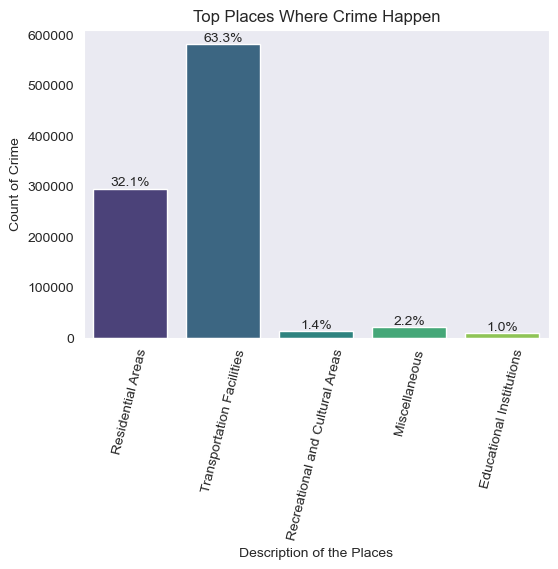

In [51]:
#visualizing the premis Description

plt.figure(figsize=(6,4))
ax = sns.countplot(x = "Premis_Desc", data = crime_data, palette="viridis")
total = len(crime_data["Premis_Desc"])
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha = "center", va ="bottom")

plt.title("Top Places Where Crime Happen")
plt.xlabel("Description of the Places")
plt.ylabel("Count of Crime")
plt.xticks(rotation=76, fontsize=10)
plt.show()

This analysis provides insights into the distribution of crime across different types of locations:

* Residential Areas: Approximately 32.1% of crimes occur in residential areas, including single-family housing, apartments, hotels, motels, cabins, etc.

* Transportation Facilities: The majority, around 63.3%, of crimes occur in areas related to transportation, such as cars, trains, shuttles, streets, parking lots, etc.

* Miscellaneous Areas: Only a small percentage of crimes occur in Miscellaneous Areas.
    
* Recreational and Cultural Areas: Similarly, there is a low occurrence of crime inRecreational and Cultural Areas.

* Educational Institutions: A negligible proportion of crimes happen in Educational Institutions areas not covered by the above categories.

This breakdown highlights that the highest concentration of crimes happens in transportation-related locations, while residential areas also see a significant portion of criminal activity. Conversely, recreational, cultural, and educational areas experience relatively fewer incidents of crime.

#### Looking at the Victim Sex

In [52]:
crime_data = crime_data[crime_data["Vict_Sex"]!= '-']#This gets rid of the rows that are "_"

In [53]:
crime_data["Vict_Sex"].unique()#unique valus in victim sex

array(['F', 'M', 'X', 'Unknown', 'H'], dtype=object)

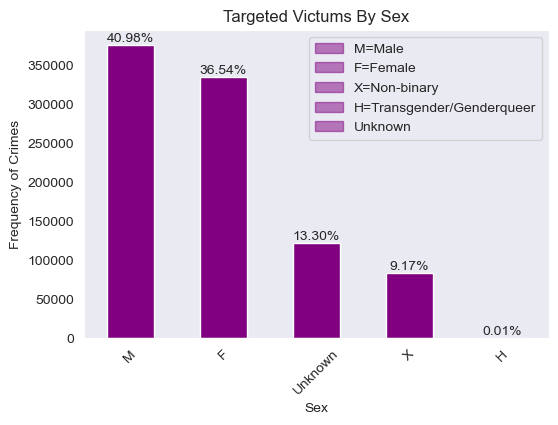

In [54]:
most_targeted_by_sex = crime_data["Vict_Sex"].value_counts()
total_count = most_targeted_by_sex.sum()

plt.figure(figsize=(6,4))
ax = most_targeted_by_sex.plot(kind="bar", color = "purple")

for i, count in enumerate(most_targeted_by_sex):
    percentage = count / total_count * 100
    plt.text(i, count, f"{percentage:.2f}%", ha="center", va="bottom", fontsize=10)

plt.title("Targeted Victums By Sex")
plt.ylabel("Frequency of Crimes")
plt.xlabel("Sex")
plt.xticks(rotation=45)
legend_handles = [plt.Rectangle((0,0),1,1, color='purple', alpha=0.5) for _ in range(len(most_targeted_by_sex))]
legend_labels = ['M=Male','F=Female','X=Non-binary','H=Transgender/Genderqueer','Unknown',]
plt.legend(legend_handles, legend_labels)

plt.show()

In my data analysis of victim sex, males are the most targeted gender, comprising 40.98% of victims, followed by females at 36.54%. Notably, 13.30% of victim sex data is unknown, leaving uncertainty regarding whether these victims are male, female, or another gender. Additionally, 9.17% of victims identify as non-binary, while less than 1% identify as transgender/genderqueer.

However, it's essential to consider that these findings are based solely on victim data and do not provide insights into the gender of perpetrators. Furthermore, drawing conclusions about the city of Los Angeles requires knowledge of its population's gender distribution and other contextual factors. Additionally, the absence of data on the gender of perpetrators limits the comprehensiveness of this analysis.

#### Looking at the Victim Sex

In [55]:
#this looks at all th unique age values in victim age column sorted
np.sort(crime_data["Vict_Age"].unique())

array([ -4,  -3,  -2,  -1,   0,   2,   3,   4,   5,   6,   7,   8,   9,
        10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 120],
      dtype=int64)

In [56]:
#It is impossible to have a negative age so I am going to drop all the ages that are negative and over 100
crime_data=crime_data[(crime_data["Vict_Age"]>0) & (crime_data["Vict_Age"]<100)]#looks only at age from 0-100

In [57]:
#I am going to bin my ages so it is easier for analysis 
bins= [0,18,25,35,45,55,65,75,100]
labels = ["0-18","19-25","26-35","36-45","46-55","56-65","66-75","76-100"]
crime_data["Age_Group"] = pd.cut(crime_data["Vict_Age"],bins = bins, labels=labels,right = False)

In [58]:
crime_data["Age_Group"].value_counts() #binned age value counts

26-35     190615
36-45     151312
46-55     105558
19-25      87259
56-65      74899
66-75      36409
0-18       24387
76-100     15713
Name: Age_Group, dtype: int64

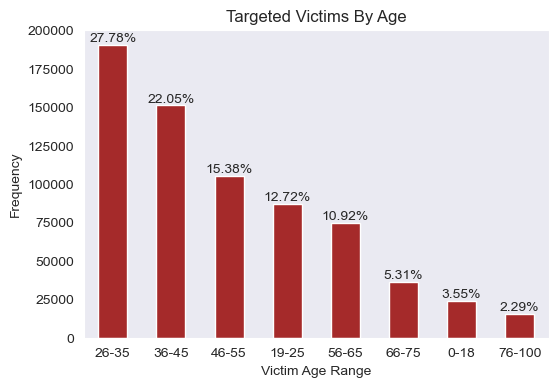

In [59]:
targeted_victum_by_age =crime_data["Age_Group"].value_counts()
total_count_age = len(crime_data["Age_Group"])

plt.figure(figsize=(6,4))
ax = targeted_victum_by_age.plot(kind = "bar", color = "brown")
for i, count in enumerate(targeted_victum_by_age):
    percentage = count / total_count_age * 100
    plt.text(i, count, f"{percentage:.2f}%", ha="center", va="bottom", fontsize=10)

plt.title("Targeted Victims By Age")
plt.xlabel("Victim Age Range")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

Based on my findings, the most frequent crime victims fall within the age range of 26-35, constituting nearly 28% of all victims. This demographic group is often targeted due to their status as young adults with disposable income from employment, yet they may lack experience and awareness, making them vulnerable targets.

Following closely, the age group of 36-45 represents approximately 22% of crime victims. Those aged 46-55 account for about 15% of victims, while the 19-25 age range comprises roughly 13% of victims. Conversely, individuals aged 76-100 are the least likely targets, making up only about 2% of all victims.

#### Looking at Date Crime Occurred and Time Crime Occured

In [60]:
#looking at the head of my data just to remind myselt what my dataframe look like
crime_data.head()

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Status,Status_Desc,Crm_Cd_1,LAT,LON,Age_Group
0,211410751,04/30/2021 12:00:00 AM,06/12/2020 12:00:00 AM,930,14,Pacific,1438,354,THEFT OF IDENTITY,30,F,B,501.0,Residential Areas,IC,Invest Cont,354.0,33.984254,-118.424256,26-35
1,200416028,12/17/2020 12:00:00 AM,12/17/2020 12:00:00 AM,1525,4,Hollenbeck,473,900,VIOLATION OF COURT ORDER,65,M,H,504.0,Residential Areas,IC,Invest Cont,900.0,34.054231,-118.203337,66-75
5,210705082,12/15/2020 12:00:00 AM,12/13/2020 12:00:00 AM,2300,7,Wilshire,758,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,29,M,K,101.0,Transportation Facilities,IC,Invest Cont,331.0,34.061807,-118.352063,26-35
6,201716029,12/05/2020 12:00:00 AM,12/05/2020 12:00:00 AM,1600,17,Devonshire,1767,626,INTIMATE PARTNER - SIMPLE ASSAULT,30,M,O,502.0,Residential Areas,IC,Invest Cont,626.0,34.250256,-118.538980,26-35
7,201213840,05/30/2020 12:00:00 AM,05/30/2020 12:00:00 AM,1000,12,77th Street,1243,901,VIOLATION OF RESTRAINING ORDER,72,F,B,104.0,Transportation Facilities,IC,Invest Cont,901.0,33.977681,-118.297220,66-75


In [61]:
#I am going to turn the Date_OCC column to datetime datatype from object data type. I am then going to extract the month values
crime_data["DATE_OCC"]= pd.to_datetime(crime_data["DATE_OCC"])
crime_data["Month_OCC"]=crime_data["DATE_OCC"].dt.month # I am going to make a new column called Month_OCC, that has the month crime occurred 

In [62]:
crime_data["Month_OCC"].value_counts()

1     68559
2     64119
3     59226
7     57086
10    56759
8     56575
6     54960
5     54937
9     54496
12    53828
11    52971
4     52636
Name: Month_OCC, dtype: int64

In [63]:
#Currently the months are in numbers so I am going to map it to turn them into the actual name of the months

In [64]:
month_map = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'}
crime_data['Month_OCC'] = crime_data['Month_OCC'].map(month_map)
crime_by_month = crime_data['Month_OCC'].value_counts()


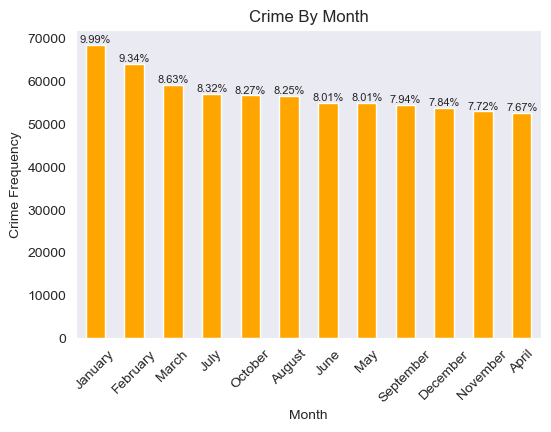

In [65]:
total_crime_by_month_count = len(crime_data['Month_OCC'])

plt.figure(figsize=(6,4))
ax = crime_by_month.plot(kind = "bar", color ="orange")

for i, count in enumerate(crime_by_month):
    percentage = count / total_crime_by_month_count * 100
    plt.text(i, count, f"{percentage:.2f}%", ha="center", va="bottom", fontsize=8)

plt.title("Crime By Month")
plt.ylabel("Crime Frequency")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

The analysis reveals that January and February exhibit the highest crime activity, constituting approximately 10% and 9.94% of all recorded crimes, respectively. This trend might be attributed to various factors, including the winter holidays and colder weather conditions prevalent during these months. Conversely, April emerges as the month with the lowest crime rate, accounting for 7.76% of all reported incidents. Interestingly, crime occurrences in the remaining months appear to be evenly distributed, indicating relatively stable crime rates throughout the year. Further investigation into seasonal variations and potential influencing factors could provide deeper insights into the observed patterns.

In [66]:
#plt.figure(figsize=(8, 6))
#sns.violinplot(x='Month_OCC', y="AREA", data=crime_data, palette="Set2")
#plt.title("Distribution of Crime Area by Month of Crime Occurrence")
#plt.xlabel("Month of Crime")
#plt.ylabel("Area")
#plt.xticks(rotation=45)
#plt.show()

In [67]:
#looking at the time crime occurred
crime_data["TIME_OCC"]

0          930
1         1525
5         2300
6         1600
7         1000
          ... 
917869    1415
917870    1920
917871     720
917872    2330
917873    1510
Name: TIME_OCC, Length: 686152, dtype: int64

In [68]:
# Define the bins and labels
bins = [0, 600, 1200, 1800, 2400]
labels = ["Night", "Morning", "Afternoon", "Evening"]

# Bin the values
crime_data["Time_Bin"] = pd.cut(crime_data["TIME_OCC"], bins=bins, labels=labels, right=False)
total_time_bin = len(crime_data["Time_Bin"])

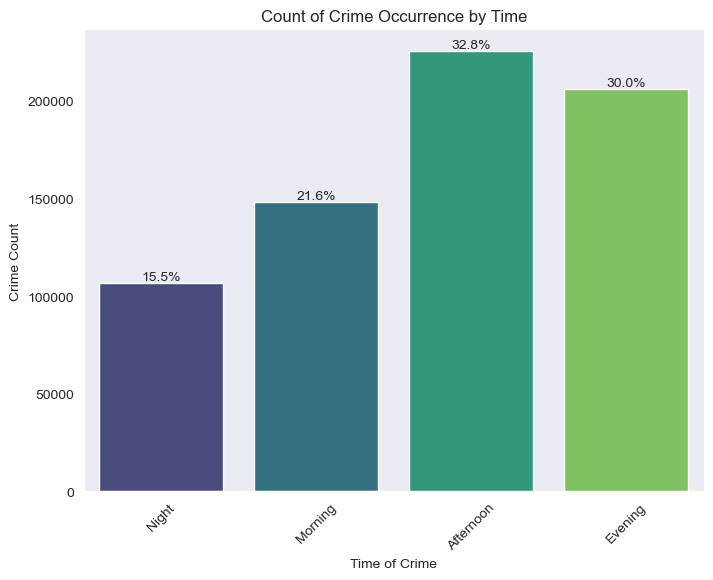

In [69]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="Time_Bin", data=crime_data, palette="viridis")

for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height()/total_time_bin)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha = "center", va ="bottom")


plt.title("Count of Crime Occurrence by Time")
plt.xlabel("Time of Crime")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.show()

Based on the analysis, it's evident that the afternoon emerges as the peak period for crime occurrences, constituting approximately 32.8% of all reported incidents, followed closely by the evening with 30%. This observation aligns with the typical patterns of urban activity, as the afternoon and evening hours coincide with peak hours of bustling city life, where people are out and about engaging in various activities. In contrast, crime rates during the morning hours contribute to 21.6% of all incidents, while nighttime incidents represent 15.5% of the total. It's important to note the time categorization based on a 24-hour clock: the nighttime spans from 1 AM to 6 AM, mornings cover the period from 6 AM to 12 PM, afternoons range from 12 PM to 6 PM, and evenings extend from 6 PM to 12 AM.

These findings underscore the significance of temporal patterns in crime occurrences, shedding light on potential areas for targeted law enforcement efforts and community safety initiatives, particularly during peak hours of activity. Further exploration into the specific types of crimes prevalent during each time period could provide valuable insights for devising tailored prevention strategies and enhancing overall urban security measures.

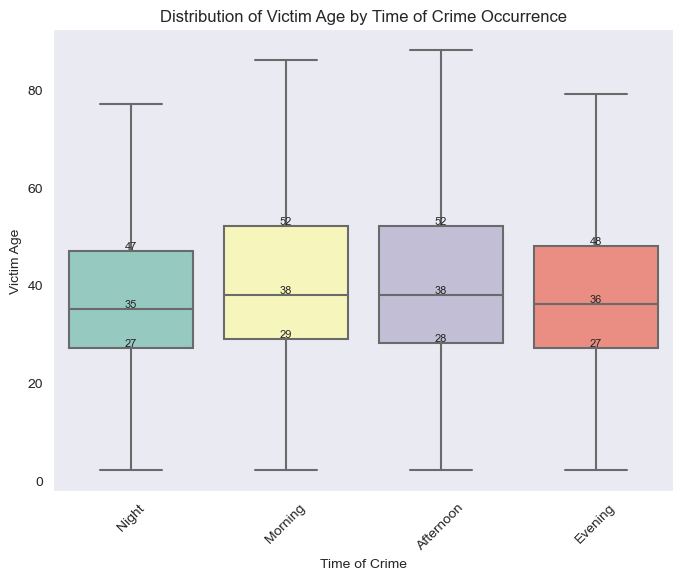

In [70]:
quantiles = crime_data.groupby("Time_Bin")["Vict_Age"].quantile([0,0.25,0.5,0.75,1]).unstack()
plt.figure(figsize=(8, 6))
sns.boxplot(x="Time_Bin", y="Vict_Age", data=crime_data, palette="Set3",showfliers=False)

for i, time_bin in enumerate(quantiles.index):
    for j, quantile in enumerate(quantiles.columns):
        if quantile != 0 and quantile != 1:
            plt.text(i, quantiles.loc[time_bin, quantile], f"{quantiles.loc[time_bin, quantile]:.0f}",
                 ha="center", va="bottom", fontsize=8)

plt.title("Distribution of Victim Age by Time of Crime Occurrence")
plt.xlabel("Time of Crime")
plt.ylabel("Victim Age")
plt.xticks(rotation=45)
plt.show()

Based on my box plot, 

* Night: The median victim age is 35, with the interquartile range (IQR) spanning from 27 to 47. This suggests that during the night, the majority of victims fall within a relatively narrow age range, with fewer outliers. Crimes during the night tend to involve victims who are younger on average compared to other times of the day.
* Morning: The median victim age is 38, with an IQR from 29 to 52. While the median age is slightly higher compared to the night, there is a wider spread of ages among victims during the morning hours.
* Afternoon: The median victim age is 38, with an IQR from 28 to 52. Similar to the morning, the afternoon also exhibits a wide spread of ages among victims, with a median age similar to that of the morning.
* Evening: The median victim age is 36, with an IQR from 27 to 48. Like the other daytime periods, the evening shows a diverse age range among victims, with a median age close to that of the afternoon.

Overall, these comparisons suggest that while there may be slight variations in the median victim age across different times of the day, the interquartile range for victim ages tends to overlap significantly between morning, afternoon, and evening. This indicates that the age distribution of crime victims during these daytime periods is relatively similar. However, crimes occurring during the night tend to involve younger victims on average.

In [71]:
crime_data.head(3)

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Vict_Descent,Premis_Cd,Premis_Desc,Status,Status_Desc,Crm_Cd_1,LAT,LON,Age_Group,Month_OCC,Time_Bin
0,211410751,04/30/2021 12:00:00 AM,2020-06-12,930,14,Pacific,1438,354,THEFT OF IDENTITY,30,F,B,501.0,Residential Areas,IC,Invest Cont,354.0,33.984254,-118.424256,26-35,June,Morning
1,200416028,12/17/2020 12:00:00 AM,2020-12-17,1525,4,Hollenbeck,473,900,VIOLATION OF COURT ORDER,65,M,H,504.0,Residential Areas,IC,Invest Cont,900.0,34.054231,-118.203337,66-75,December,Afternoon
5,210705082,12/15/2020 12:00:00 AM,2020-12-13,2300,7,Wilshire,758,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,29,M,K,101.0,Transportation Facilities,IC,Invest Cont,331.0,34.061807,-118.352063,26-35,December,Evening


In [72]:
#Removes rows with "_"
crime_data = crime_data[crime_data["Vict_Descent"] !='-']
crime_data["Vict_Descent"].unique()

array(['B', 'H', 'K', 'O', 'W', 'F', 'X', 'A', 'C', 'V', 'J', 'G', 'I',
       'S', 'P', 'Z', 'Unknown', 'U', 'D', 'L'], dtype=object)

In [73]:
#mapping so it is easier to understand
descent_map = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}


In [74]:
crime_data["Vict_Descent"]=crime_data["Vict_Descent"].map(descent_map)
total_vict_d=len(crime_data["Vict_Descent"])

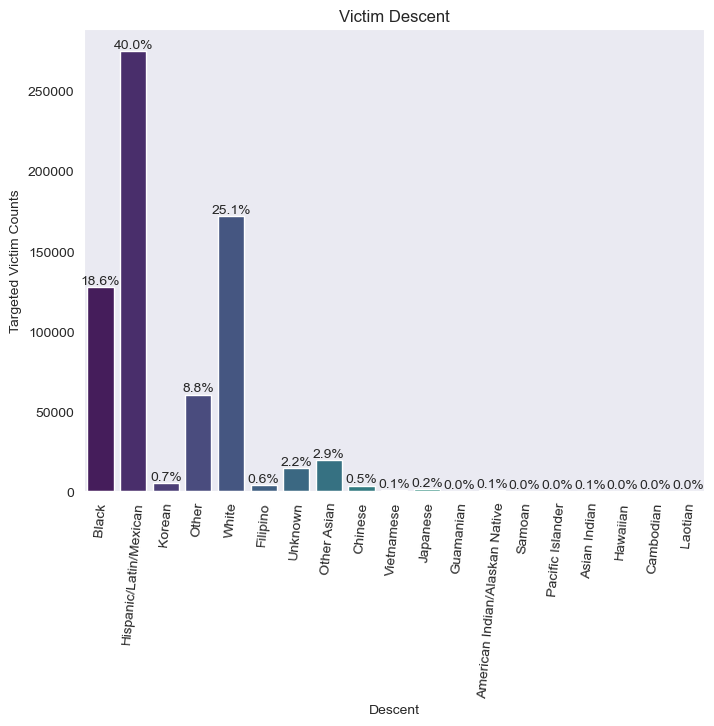

In [75]:
#visualizing my findings 
plt.figure(figsize=(8,6))
ax = sns.countplot(x="Vict_Descent",data=crime_data, palette="viridis")

for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height()/total_vict_d)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x,y), ha = "center", va ="bottom")


plt.title("Victim Descent")
plt.ylabel("Targeted Victim Counts")
plt.xlabel("Descent")
plt.xticks(rotation=85)
plt.show()

Based on the analysis, the most targeted victims by race or ethnicity are Hispanic/Latin/Mexican, comprising 40% of all victims. This high percentage could potentially be attributed to various factors, including cultural tensions, socioeconomic disparities, or targeted immigration-related crimes. Given Los Angeles's proximity to regions with significant Hispanic/Latin/Mexican populations, such as Central and South America, it's plausible that these groups are disproportionately affected by crime.

Following Hispanic/Latin/Mexican victims, the next most targeted racial/ethnic group is white, accounting for 25.1% of victims. This is followed by black victims, making up 18.6% of all victims. However, it's crucial to interpret these findings within the context of Los Angeles's demographics. The demographics of the city can heavily influence crime victimization patterns. For instance, if the majority of Los Angeles residents are white or Hispanic/Latin/Mexican, it's expected that these groups would also comprise a significant portion of crime victims simply due to their higher representation in the population.

Before drawing definitive conclusions about crime targeting based on race or ethnicity, it's essential to conduct further analyses that consider demographic factors and potential biases in crime reporting and data collection. Additionally, exploring underlying socio-economic factors and historical contexts can provide deeper insights into the dynamics of crime victimization within different racial and ethnic groups.

### Filtering some Columns for Camparison and Further Analysis

In [76]:
#I am filtering "AREA_NAME","Premis_Desc","Month_OCC","Time_Bin" and renaming Time_Bin to Time_OCC
filtered_crime_data = crime_data[["AREA_NAME","Premis_Desc","Month_OCC","Time_Bin"]].rename(columns={"Time_Bin":"Time_Occ"})

In [77]:
#head of my filtered data
filtered_crime_data.head()

,AREA_NAME,Premis_Desc,Month_OCC,Time_Occ
0,Pacific,Residential Areas,June,Morning
1,Hollenbeck,Residential Areas,December,Afternoon
5,Wilshire,Transportation Facilities,December,Evening
6,Devonshire,Residential Areas,December,Afternoon
7,77th Street,Transportation Facilities,May,Morning


I filtered these specific columns because my question and hypothesis focused on examining the relationship between the location, such as Area_Name and Premis_Desc, and the time (Month_OCC, Time_Occ) when crimes occur.

Filtering these columns allows me to focus my analysis on the key variables that are relevant to my research question. By examining the relationships between these variables, I can gain insights into patterns and trends in crime occurrence based on location and time. This approach enables a more targeted investigation into the factors that may influence crime rates and distribution.

Additionally, by narrowing down the dataset to these specific columns, I can streamline my analysis process and avoid unnecessary complexity. This focused approach helps ensure that my findings are directly aligned with my research objectives and hypothesis, facilitating a more accurate interpretation of the results.

## Analysis 

In [78]:
#Looking at eh value counts of all my filtered columns 
print("AREA Name \n")
print(filtered_crime_data['AREA_NAME'].value_counts())
print("-------------------------------------------------------------- \n")
print("Premis Describtion \n")
print(filtered_crime_data['Premis_Desc'].value_counts())
print("-------------------------------------------------------------- \n")
print("Month Of Crime Occurrance \n")
print(filtered_crime_data['Month_OCC'].value_counts())
print("-------------------------------------------------------------- \n")
print("Time Of Crime Occurrance \n")
print(filtered_crime_data['Time_Occ'].value_counts())

AREA Name 

Central        48594
77th Street    43568
Southwest      43510
Pacific        38520
Hollywood      36564
Southeast      34753
Olympic        34091
Wilshire       33249
N Hollywood    33205
Newton         31858
Topanga        31759
Rampart        31397
West LA        31221
Van Nuys       30844
West Valley    28756
Mission        27919
Northeast      27553
Devonshire     26897
Harbor         25981
Hollenbeck     22975
Foothill       22937
Name: AREA_NAME, dtype: int64
-------------------------------------------------------------- 

Premis Describtion 

Transportation Facilities          369538
Residential Areas                  284506
Miscellaneous                       15298
Recreational and Cultural Areas     10697
Educational Institutions             6112
Name: Premis_Desc, dtype: int64
-------------------------------------------------------------- 

Month Of Crime Occurrance 

January      68559
February     64119
March        59225
July         57086
October      56759
A

### Area and Time Of Crime Occurrance 

In [79]:
cross_tab = pd.crosstab(filtered_crime_data['AREA_NAME'], filtered_crime_data['Time_Occ'])

# Conduct chi-squared test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(cross_tab)
print("Chi-squared:", chi2)
print("p-value:", p)

Chi-squared: 1975.279436503424
p-value: 0.0


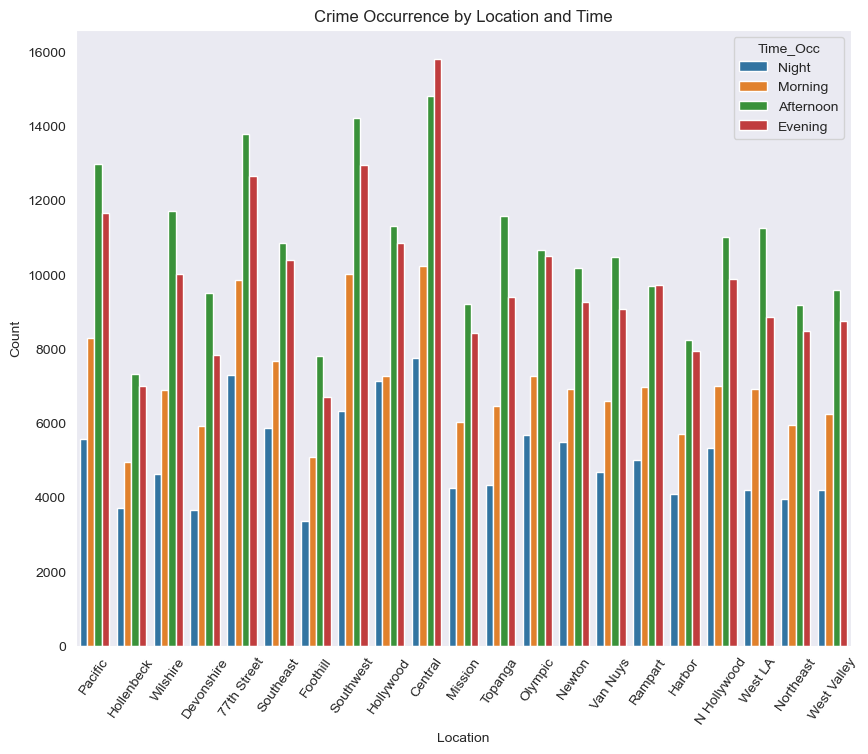

In [80]:
plt.figure(figsize=(10,8))
sns.countplot(x='AREA_NAME', hue='Time_Occ', data=filtered_crime_data)
plt.title('Crime Occurrence by Location and Time')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=55)
plt.show()

In [81]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_v(filtered_crime_data['AREA_NAME'], filtered_crime_data['Time_Occ'])

0.030503279541722092

**Chi-squared Test (Chi2):**
The chi-squared statistic quantifies how much the observed counts in the contingency table differ from the expected counts under the assumption that the variables are independent.
In my case, I obtained a chi-squared statistic of approximately 1975.28 which is pretty high leading me to belevie there might be a relationship between the two variables.

**Cramer's V Test (cramer_v):**
Cramer's V is a measure of association that normalizes the chi-squared statistic by the square root of the product of the number of rows and columns in the contingency table.
It ranges between 0 and 1, where 0 indicates no association and 1 indicates a perfect association.
In my case, I obtained a Cramer's V value of approximately 0.0305. A low Cramer's V value suggests a weak association between the variables.

**Conclusion:**

Despite obtaining a significant chi-squared statistic, the low value of Cramer's V suggests that the association between the 'AREA_NAME' and 'Time_Occ' variables is weak.
While there may be some statistical significance due to the large chi-squared value, the practical significance, as indicated by Cramer's V, is minimal.

Therefore, while there may be some relationship between the location (area name) and the time of occurrence of crimes, it is not a strong or meaningful one. Other factors may be influencing the occurrence of crimes at different times, or there may be confounding variables that need to be considered. Further analysis or exploration may be necessary to understand the relationship more deeply.

### Crime Occurrance and Location Description

In [82]:
cross_tab = pd.crosstab(filtered_crime_data['Month_OCC'], filtered_crime_data['Premis_Desc'])

# Conduct chi-squared test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(cross_tab)
print("Chi-squared:", chi2)
print("p-value:", p)

Chi-squared: 691.4381238986119
p-value: 3.076767345527358e-117


In [83]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_v(filtered_crime_data['Month_OCC'], filtered_crime_data['Premis_Desc'])

0.01535891485711807

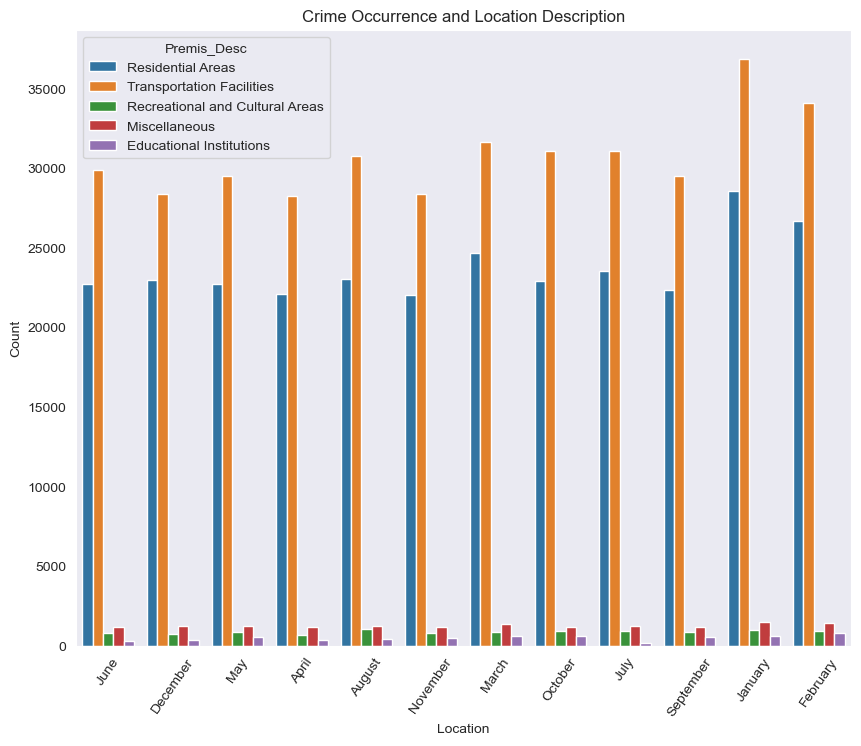

In [84]:
plt.figure(figsize=(10,8))
sns.countplot(x='Month_OCC', hue='Premis_Desc', data=filtered_crime_data)
plt.title('Crime Occurrence and Location Description')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=55)
plt.show()

Based on the analysis conducted on the relationship between the premise description and the month when crimes occur, it can be concluded that there is no significant relationship between these two variables. Here's a breakdown of the findings:

**Chi-squared Test (Chi2):**
The chi-squared statistic obtained was 691, indicating a significant association between the premise description and the month of crime occurrence.
This suggests that the observed frequencies in the contingency table differ significantly from what would be expected if the variables were independent.

**Cramer's V Test (cramer_v):**
However, Cramer's V value, which measures the strength of association, was found to be 0.015.
Cramer's V values close to zero indicate a weak association between the variables.
In this case, the low value of Cramer's V suggests that while there may be a statistically significant association due to the chi-squared test, the practical significance or strength of the relationship is minimal.

**Conclusion:**

* Despite the significant chi-squared statistic, the low Cramer's V value indicates that there is very little practical relationship between the premise description and the month of crime occurrence.
* While it is possible to reject the null hypothesis of independence based on the chi-squared test, the weak association suggested by Cramer's V suggests that the variables may not be meaningfully related in practice.
* Further investigation or analysis may be necessary to understand the nuances of this relationship and determine if there are any underlying factors contributing to the observed associations. 

In [85]:
cross_tab = pd.crosstab(filtered_crime_data['Month_OCC'], filtered_crime_data['Time_Occ'])

# Conduct chi-squared test
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(cross_tab)
print("Chi-squared:", chi2)
print("p-value:", p)

Chi-squared: 272.07788020415614
p-value: 2.1268321160703204e-39


In [86]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_v(filtered_crime_data['Month_OCC'], filtered_crime_data['Time_Occ'])

0.010777055671289561

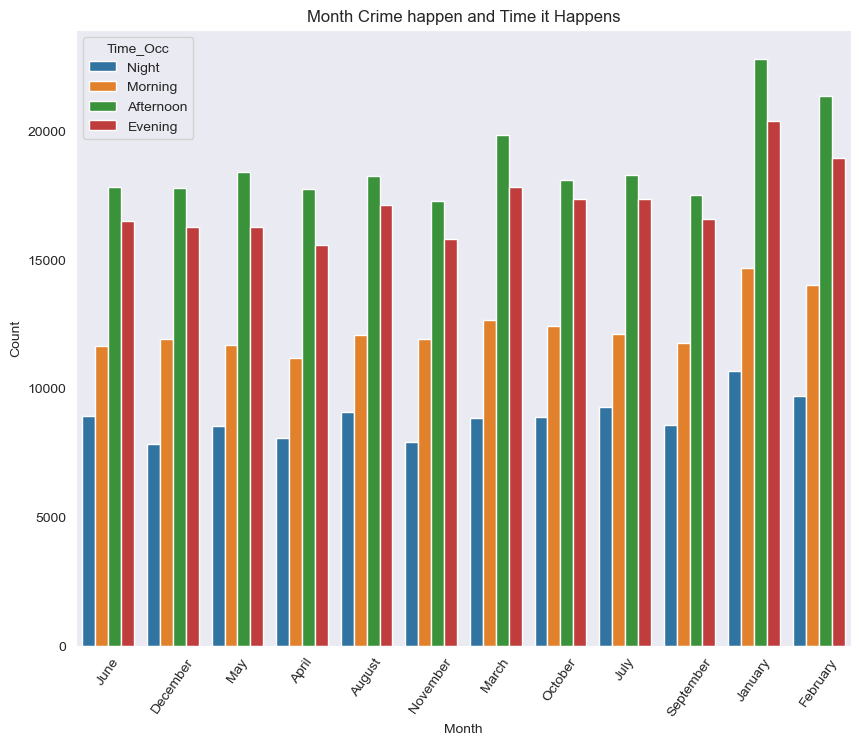

In [87]:
plt.figure(figsize=(10,8))
sns.countplot(x='Month_OCC', hue='Time_Occ', data=filtered_crime_data)
plt.title('Month Crime happen and Time it Happens')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=55)
plt.show()

Based on the results obtained from the chi-squared test and Cramer's V coefficient for the association between Month_OCC and Time_OCC:

**Chi-squared Test:**
The chi-squared statistic is 272.08, which is associated with a very small p-value (approximately 2.13e-39).
This indicates that there is a significant association between the month and the time of crime occurrence.

**Cramer's V Coefficient:**

The Cramer's V coefficient is approximately 0.0108.
This coefficient suggests a very weak association between the month and the time of crime occurrence.

**Conclusion:**

* While the chi-squared test indicates a statistically significant association due to the large sample size, the strength of this association is minimal according to Cramer's V coefficient.
* It appears that there is a slight tendency for certain months to have slightly higher or lower crime occurrences during specific times of the day, but this association is not particularly strong.
* Further investigation may be warranted to understand any underlying patterns or factors contributing to this weak association.

## Conclusion

In conclusion, the analysis conducted does not provide sufficient evidence to reject the null hypothesis, which states that there is no significant relationship between the location and time of crime occurrence. This suggests that the occurrence of crime does not depend heavily on either the location or the time.

However, it is noteworthy that there are some observable patterns in the data. For instance, crime appears to be more prevalent during the afternoon and evening hours, possibly due to increased activity and traffic during these times. Additionally, there seems to be a slight uptick in crime during the winter months of January and February, coinciding with major holidays such as New Year's and Christmas. These observations warrant further investigation to better understand the underlying factors driving crime patterns.

It's important to acknowledge the limitations of the analysis, such as potential confounding variables and the complexity of crime dynamics. Future research could delve deeper into specific geographic areas or types of crime to uncover more nuanced relationships between location, time, and crime occurrence.

Overall, while the initial analysis did not yield conclusive results, it provides valuable insights into the dynamics of crime occurrence, laying the groundwork for more comprehensive studies in the future.
